In [61]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [19]:
# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

# Specify the dataset you want to download
dataset_name = 'saurabhshahane/road-traffic-accidents'

# Download the dataset
api.dataset_download_files(dataset_name, path='.', unzip=True)  # 'path' specifies the directory to save files


Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents


In [127]:
# Loading the dataset
traffic_data = pd.read_csv('RTA_Dataset.csv')

# Viewing first few rows of the dataset
traffic_data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [129]:
traffic_data.shape
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [131]:
# Checking for missing values
traffic_data.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [133]:
# Check the percentage of missing values in each column
missing_percent = traffic_data.isnull().sum() / len(traffic_data) * 100
print(missing_percent)


Time                            0.000000
Day_of_week                     0.000000
Age_band_of_driver              0.000000
Sex_of_driver                   0.000000
Educational_level               6.016564
Vehicle_driver_relation         4.701202
Driving_experience              6.731082
Type_of_vehicle                 7.713543
Owner_of_vehicle                3.913608
Service_year_of_vehicle        31.893472
Defect_of_vehicle              35.945112
Area_accident_occured           1.940565
Lanes_or_Medians                3.126015
Road_allignment                 1.152972
Types_of_Junction               7.202014
Road_surface_type               1.396557
Road_surface_conditions         0.000000
Light_conditions                0.000000
Weather_conditions              0.000000
Type_of_collision               1.258525
Number_of_vehicles_involved     0.000000
Number_of_casualties            0.000000
Vehicle_movement                2.500812
Casualty_class                  0.000000
Sex_of_casualty 

In [135]:
traffic_data = traffic_data.drop(columns=['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality','Fitness_of_casuality'])

In [137]:
categorical_cols_mode = ['Educational_level', 'Driving_experience', 'Type_of_vehicle', 'Types_of_Junction', 'Vehicle_driver_relation', 'Owner_of_vehicle', 'Lanes_or_Medians',
                    'Road_allignment', 'Area_accident_occured', 'Type_of_collision', 'Vehicle_movement', 'Road_surface_type']
for col in categorical_cols_mode:
    traffic_data[col].fillna(traffic_data[col].mode()[0], inplace=True)


In [139]:
traffic_data.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [141]:
# Saving the cleaned dataset
traffic_data.to_csv('cleaned_traffic_data.csv', index=False)


### Time of day analysis

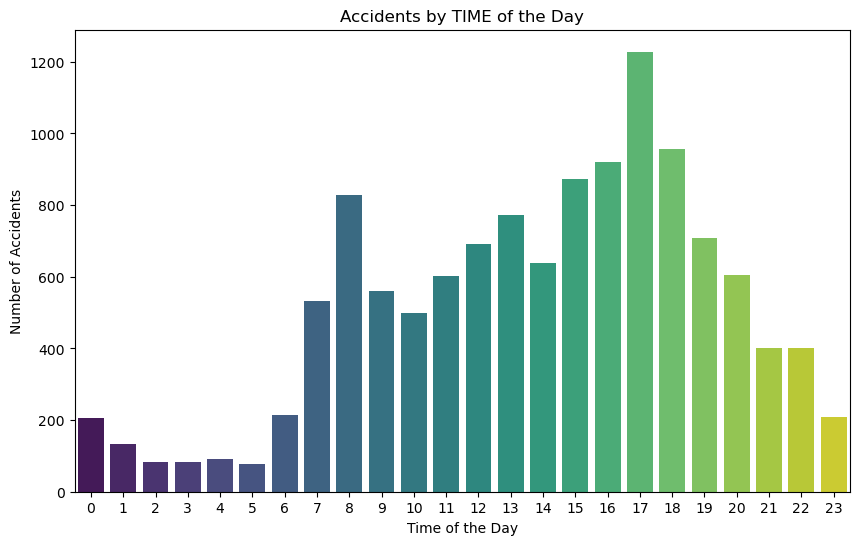

In [144]:
# Convert Time column to datetime if it's not already
traffic_data['Time'] = pd.to_datetime(traffic_data['Time'], errors='coerce').dt.hour

# Count accidents per hour
time_analysis = traffic_data['Time'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=time_analysis.index, y=time_analysis.values, palette='viridis')
plt.title('Accidents by TIME of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.show()

- The frequency of accidents increases gradually during the day and peaks between 16 (4 PM) to 18 (6 PM), likely corresponding to rush hours. The number of accidents then decreases as the night progresses.

- The reason behind this can be the fact that many people are traveling from work or school back home at that pick time. Roads are more congested, leading to a higher likelihood of collisions.

### Day of the Week analysis

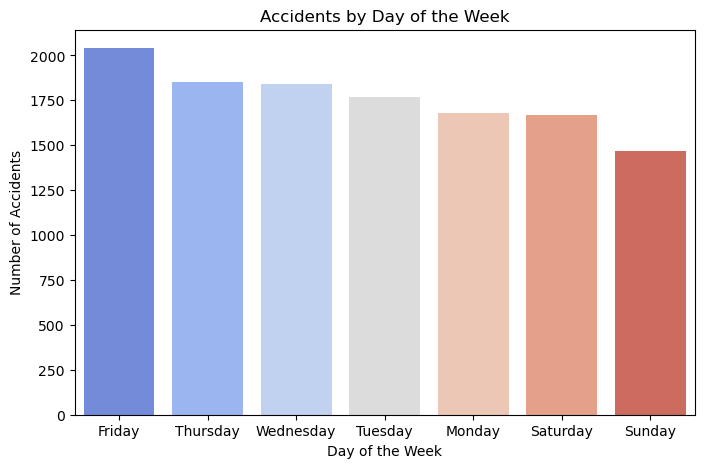

In [147]:
# Count accidents by day of the week
day_analysis = traffic_data['Day_of_week'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=day_analysis.index, y=day_analysis.values, palette='coolwarm')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()


- Friday has the highest number of accidents, while Sunday records the least.  Fridays might have higher traffic due to end-of-week activities, including social gatherings and work-related commutes. Sundays generally experience lighter traffic as fewer people commute for work.

### Analyze Road Surface Conditions

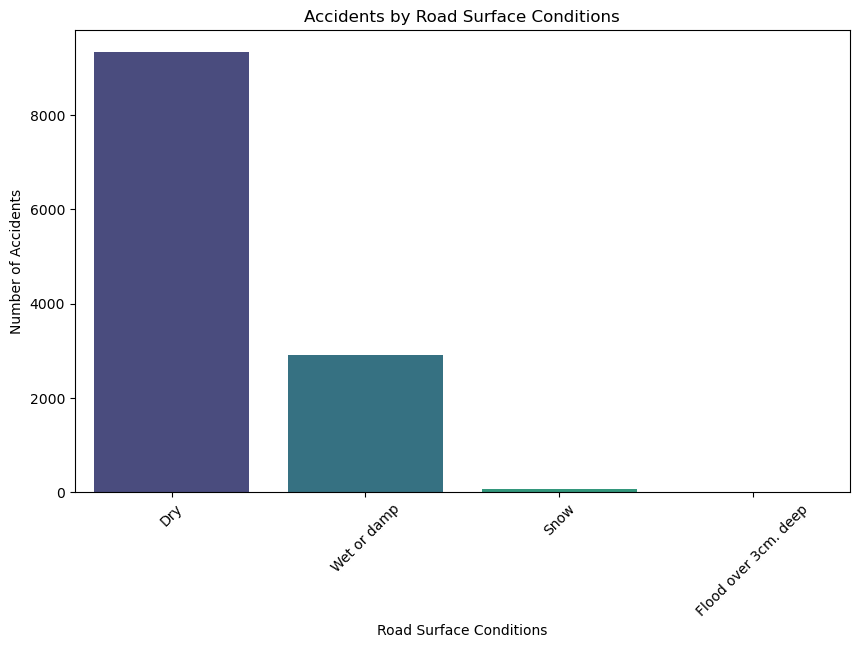

In [150]:
# Count accidents by road surface conditions
road_surface_analysis = traffic_data['Road_surface_conditions'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=road_surface_analysis.index, y=road_surface_analysis.values, palette='viridis')
plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


- The majority of accidents occur on dry roads, followed by a significant number on wet or damp roads, while snow and flooding contribute negligibly. While wet or damp conditions are known to increase accident risks, the dominance of dry-road accidents may indicate that such conditions are more prevalent, or drivers may underestimate risks under dry conditions.

### Analyze Weather Conditions

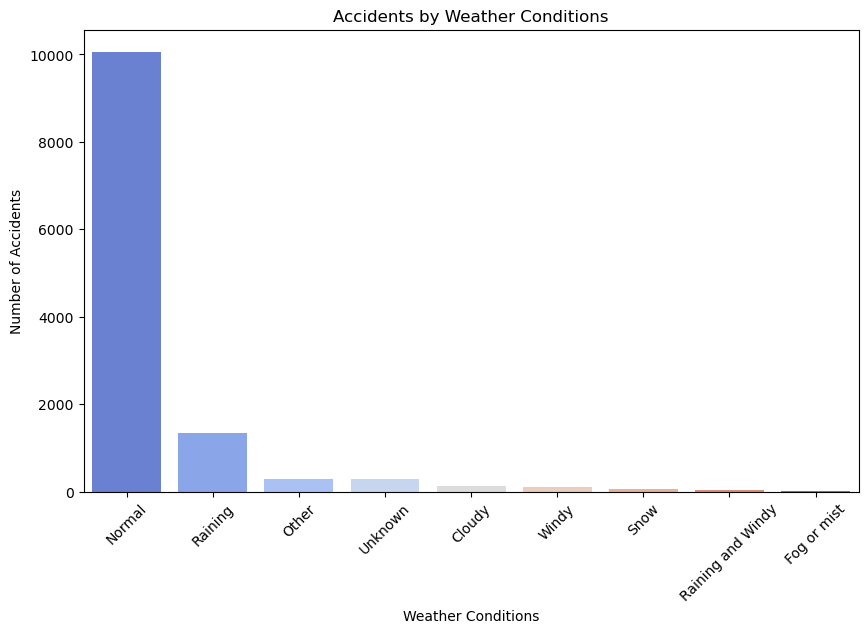

In [153]:
# Count accidents by weather conditions
weather_analysis = traffic_data['Weather_conditions'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_analysis.index, y=weather_analysis.values, palette='coolwarm')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


- The majority of accidents occur under Normal weather conditions, indicating that factors other than adverse weather significantly contribute to accidents.
- Accidents during Rainy conditions rank second, highlighting that rain poses a notable risk.
- Other conditions like Cloudy or Foggy have a much smaller contribution, suggesting their impact is less significant in the dataset.

### Visualize Accident Hotspots

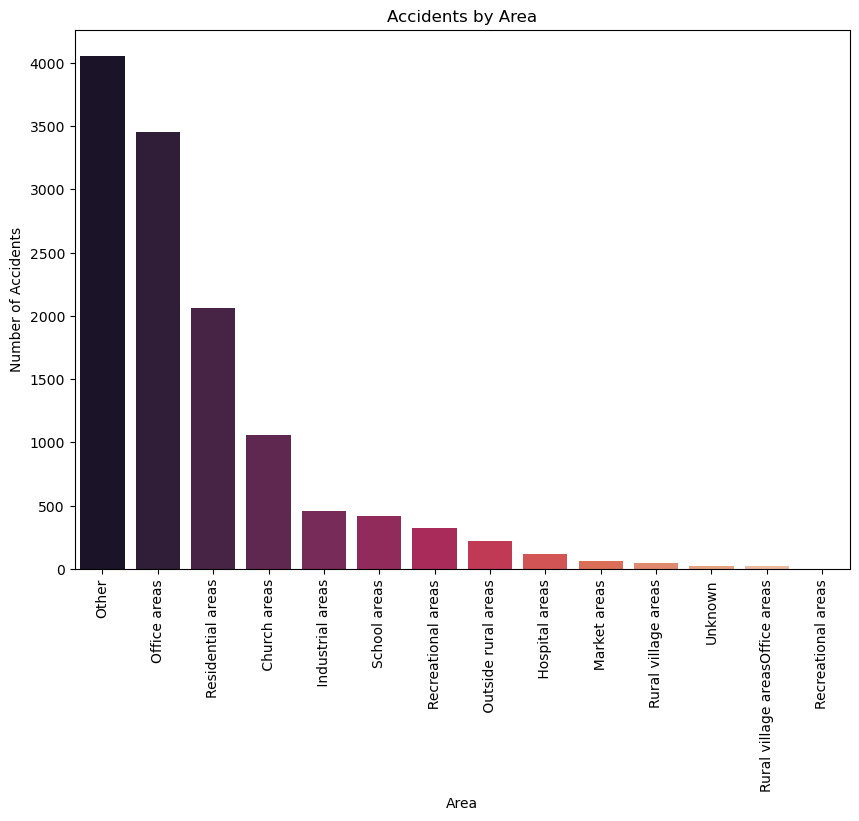

In [183]:
# Visualize the distribution of accidents across areas.

area_analysis = traffic_data['Area_accident_occured'].value_counts()

plt.figure(figsize=(10, 7))
sns.barplot(x=area_analysis.index, y=area_analysis.values, palette='rocket')
plt.title('Accidents by Area')
plt.xlabel('Area')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()


- Accidents predominantly occur in Other areas and Office areas, likely due to high traffic density in urban and commercial zones.
- Residential and church areas also show significant accident counts, indicating potential safety issues in these zones.
- Rural areas and recreational spaces have relatively lower accident counts, possibly due to lower traffic volumes.

### Analyze Contributing Factors

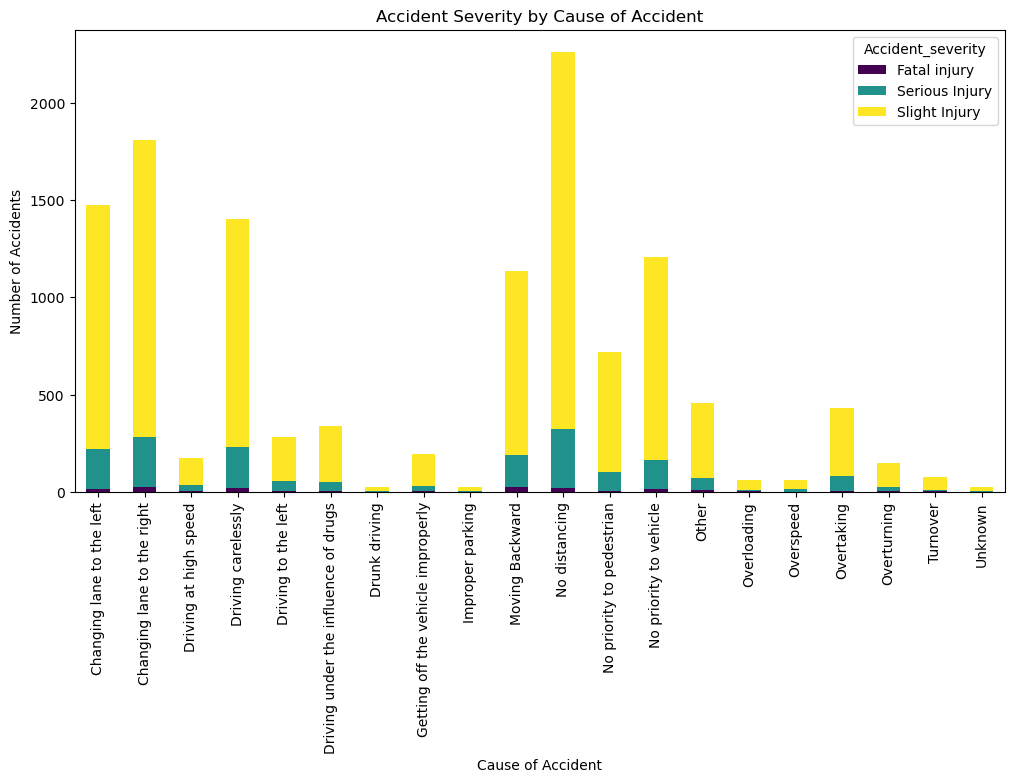

In [181]:
# Count accident severity by cause
severity_cause = traffic_data.groupby(['Cause_of_accident', 'Accident_severity']).size().unstack()

# Plot a stacked bar chart
severity_cause.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Accident Severity by Cause of Accident')
plt.xlabel('Cause of Accident')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.show()


- "No distancing" is the leading cause of accidents, especially those categorized as slight injuries.
- Other significant causes include "Driving carelessly", "Changing lane to the right", and "Driving at high speed".
- Fatal injuries are less frequent across most causes but still prominent in high-risk activities like speeding and lack of priority to pedestrians.

#### Recommendations
- Preventative measures such as improving urban traffic management, enhancing public awareness about safe driving practices, and ensuring adequate enforcement of distancing and speed regulations can help mitigate accidents.
- Weather-based risk can be addressed through better drainage systems and anti-slip road designs for rainy conditions.